### Problem Statement 

For any customer centric organisation, customer churn/retention analysis is going to be extremely valuable. It is a market reality that the banks and other financial institutions are battling to attract each other's customers while retaining their own. Thus, Customer churn reduction is the central concern of most banking organisations as switching costs to the customer
are low and acquisition cost to the organisation is high. Churn reduces profitability as it
means potential loss of future revenue and also losing the invested costs of acquisition. On
the other hand, long term customers contribute to profitability through mere continued association as they are less costly to serve and through additional services and referrals. It is important to have data that underlies construction of purchase decision and also the underlying
loyalty hooks. So a good deal of marketing budget is allocated to engage customer on an
ongoing basis and prevent churn by designing new plans and offering freebees, discounts
etc. Thus, it is important to predict the customers who are likely to churn and develop appropriate modalities for retention.
An international bank has a business problem with customer retention and observed high
churn rates. The bank observed that alarming number of existing customers exit while it is
getting increasingly difficult to acquire new customers. So they want to understand the hidden patterns in their customer behaviour by use of customer data which has early warning
signs.This helps understand the drivers behind considering an alternative. The variables
could be demographic, perception or behavioural.
You are expected to create an analytical and modelling framework to predict the customer
churn in a bank based on the quantitative and qualitative features provided in the datasets. 

## Importing all the required Libraires

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

### Train Score Function 

In [2]:
def Train_Scores(confusion_matrix_test):

    Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(np.sum(confusion_matrix_train))

    Precision_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,1]+confusion_matrix_train[0,1])
    Recall_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    F1_Train= (2*Precision_Train*Recall_Train)/(Precision_Train/Recall_Train)
    print("Train Scores")
    print("Train Precision: ",Precision_Train)
    print("Train Recall: ",Recall_Train)
    print("Train Accuracy: ",Accuracy_train)
    print("F1 Score Train: ",F1_Train)

### Test Score Function

In [3]:
def Test_Scores(confusion_matrix_test):

    Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(np.sum(confusion_matrix_test))

    Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
    Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    F1_Test= (2*Precision_Test*Recall_Test)/(Precision_Test/Recall_Test)
    print("Test Scores")
    print("Test Precision: ",Precision_Test)
    print("Test Recall: ",Recall_Test)
    print("Test Accuracy: ",Accuracy_test)
    print("F1 Score Test: ",F1_Test)

### Reading the data 

In [4]:
bankdata = pd.read_csv("train_data-1578037482430.csv", sep=',', header=0,
                        na_values='unknown')

### Shape/Dimension of the data

In [5]:
print(bankdata.shape) 

(7360, 21)


In [6]:
bankdata.head() #Checking the first 5 elements 

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,NaN,NaN,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,0


In [7]:
print(list(bankdata.columns)) #Printing the Column names

['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth', 'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn']


In [8]:
print((bankdata.dtypes)) # Getting all the data types

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object


In [9]:
bankdata.describe() #Exploratory analysis

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
bankdata.describe(include='object')

,CustomerID,CustomerName,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse
count,7360,7360,7360,7360,5500,7360,6579,7169
unique,7360,7360,2,3,3,3,6,2
top,C4199584,Name_8819514,Male,Location11,primary,single,admin.,no
freq,1,1,3994,3693,1864,2559,3207,3684


In [11]:
# Dropping the Unneccesary columns

bankdata.drop("CustomerID", axis = 1, inplace= True)  
bankdata.drop("CustomerName", axis = 1, inplace= True)

In [12]:
bankdata.describe(include='object')

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse
count,7360,7360,5500,7360,6579,7169
unique,2,3,3,3,6,2
top,Male,Location11,primary,single,admin.,no
freq,3994,3693,1864,2559,3207,3684


### Converting necessary numerical columns to Categorical

In [13]:
bankdata['NumberOfProducts'] = bankdata['NumberOfProducts'].astype('category')
bankdata['IsCreditCardCustomer'] = bankdata['IsCreditCardCustomer'].astype('category')
bankdata['ActiveMember'] = bankdata['ActiveMember'].astype('category')
bankdata['Churn'] = bankdata['Churn'].astype('category')

### Converting all object datatype to categorical

In [14]:
cat_attr1 = list(bankdata.select_dtypes("object").columns)
cat_attr1

['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse']

In [15]:
for col in cat_attr1:
    bankdata[col] = bankdata[col].astype('category')

In [16]:
bankdata.describe(include='category')

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Churn
count,7360,7360,5500,7360,6579,7169,7360,7360,7360,7360
unique,2,3,3,3,6,2,4,2,2,2
top,Male,Location11,primary,single,admin.,no,1,1,1,0
freq,3994,3693,1864,2559,3207,3684,3768,5183,3757,5868


In [17]:
bankdata.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,Salary
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,99967.894062
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,57342.390262
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,11.580000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,51361.780000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,99446.940000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,149068.075000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,199992.480000


In [18]:
print((bankdata.dtypes))

yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts        category
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
dtype: object


In [19]:
print(bankdata.shape)

(7360, 19)


### Distribution of all categorical columns

In [20]:
print(bankdata.Gender.value_counts())
print(bankdata.Location.value_counts())
print(bankdata.Education.value_counts())
print(bankdata.MaritalStatus.value_counts())
print(bankdata.Occupation.value_counts())
print(bankdata.Ownhouse.value_counts())

print(bankdata.NumberOfProducts.value_counts())
print(bankdata.IsCreditCardCustomer.value_counts())
print(bankdata.ActiveMember.value_counts())


Male      3994
Female    3366
Name: Gender, dtype: int64
Location11    3693
Location12    1834
Location13    1833
Name: Location, dtype: int64
primary      1864
secondary    1839
tertiary     1797
Name: Education, dtype: int64
single      2559
married     2503
divorced    2298
Name: MaritalStatus, dtype: int64
admin.           3207
technician        770
services          762
management        749
self-employed     748
retired           343
Name: Occupation, dtype: int64
no     3684
yes    3485
Name: Ownhouse, dtype: int64
1    3768
2    3363
3     189
4      40
Name: NumberOfProducts, dtype: int64
1    5183
0    2177
Name: IsCreditCardCustomer, dtype: int64
1    3757
0    3603
Name: ActiveMember, dtype: int64


### Plot Distribution for target

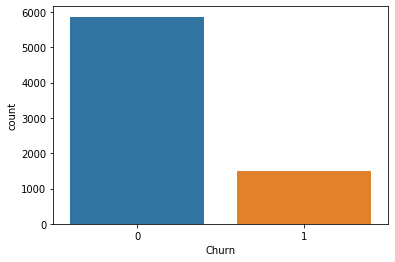

0    5868
1    1492
Name: Churn, dtype: int64
Percentage of people who have chruned out: 20.27173913043478 %


In [21]:
sns.countplot(x='Churn',data=bankdata)
plt.show()

# What are the counts?
print(bankdata.Churn.value_counts())

# What is the percentage?
count_yes = len(bankdata[bankdata.Churn == 1])
count_no = len(bankdata[bankdata.Churn != 1'])

percent_success = count_yes/(count_yes + count_no)*100

print('Percentage of people who have chruned out:', percent_success, "%")

### Corelation on Numerical features

In [22]:
corr = bankdata.corr()

In [23]:
print(corr)

                yearofBirth  monthofBirth  dayofBirth  yearofEntry  \
yearofBirth        1.000000      0.005599   -0.000953    -0.004867   
monthofBirth       0.005599      1.000000    0.002987     0.002767   
dayofBirth        -0.000953      0.002987    1.000000     0.002092   
yearofEntry       -0.004867      0.002767    0.002092     1.000000   
monthofEntry       0.002687      0.019782    0.010540     0.009005   
dayofEntry        -0.006444     -0.002087    0.012893    -0.003492   
CreditScore        0.004256      0.010518   -0.009132    -0.006094   
AccountBalance    -0.026029      0.012895    0.001349     0.013077   
Salary             0.008223     -0.002486   -0.012105    -0.003759   

                monthofEntry  dayofEntry  CreditScore  AccountBalance  \
yearofBirth         0.002687   -0.006444     0.004256       -0.026029   
monthofBirth        0.019782   -0.002087     0.010518        0.012895   
dayofBirth          0.010540    0.012893    -0.009132        0.001349   
yearofE

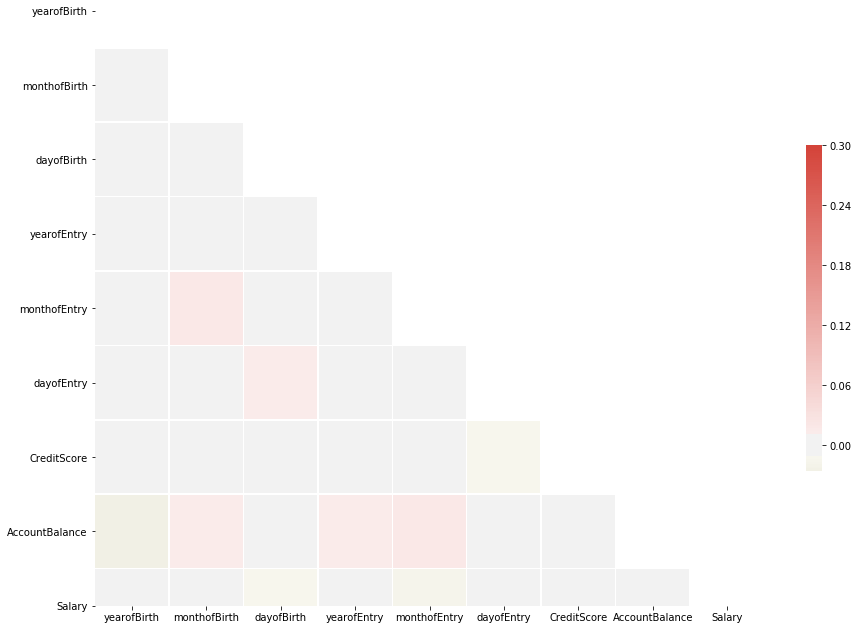

In [24]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(800, 14, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Analysing the categorical columns with the target variable

In [104]:
print(bankdata[bankdata.Churn == 1].Gender.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].Location.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].Education.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].MaritalStatus.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].Occupation.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].Ownhouse.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].NumberOfProducts.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].IsCreditCardCustomer.value_counts(normalize=True))

print(bankdata[bankdata.Churn == 1].ActiveMember.value_counts(normalize=True))


#Plots of these distribution are collated in a excel and attached

Female    0.549598
Male      0.450402
Name: Gender, dtype: float64
Location12    0.404155
Location11    0.381367
Location13    0.214477
Name: Location, dtype: float64
secondary    0.360215
primary      0.325269
tertiary     0.314516
Name: Education, dtype: float64
single      0.357909
married     0.321046
divorced    0.321046
Name: MaritalStatus, dtype: float64
admin.           0.573855
services         0.096750
self-employed    0.091581
management       0.091581
technician       0.084934
retired          0.061300
Name: Occupation, dtype: float64
no     0.502699
yes    0.497301
Name: Ownhouse, dtype: float64
1    0.699062
2    0.169571
3    0.104558
4    0.026810
Name: NumberOfProducts, dtype: float64
1    0.684316
0    0.315684
Name: IsCreditCardCustomer, dtype: float64
0    0.633378
1    0.366622
Name: ActiveMember, dtype: float64


### Dividing the numerical columns and categorical  columns

In [27]:
cat_attr = list(bankdata.select_dtypes("category").columns)
num_attr = list(bankdata.columns.difference(cat_attr))

In [28]:
cat_attr

['Gender',
 'Location',
 'Education',
 'MaritalStatus',
 'Occupation',
 'Ownhouse',
 'NumberOfProducts',
 'IsCreditCardCustomer',
 'ActiveMember',
 'Churn']

In [29]:
num_attr

['AccountBalance',
 'CreditScore',
 'Salary',
 'dayofBirth',
 'dayofEntry',
 'monthofBirth',
 'monthofEntry',
 'yearofBirth',
 'yearofEntry']

In [30]:
cat_attr.remove('Churn') #Dropping the Target column

In [31]:
bankdata.isnull().sum() #Checking the NA values

yearofBirth                0
monthofBirth               0
dayofBirth                 0
yearofEntry                0
monthofEntry               0
dayofEntry                 0
Gender                     0
Location                   0
Education               1860
MaritalStatus              0
Occupation               781
Ownhouse                 191
CreditScore                0
AccountBalance             0
NumberOfProducts           0
IsCreditCardCustomer       0
ActiveMember               0
Salary                     0
Churn                      0
dtype: int64

### Pipeline Initialization

In [32]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value="missing_value")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)
])

### Train and Test Split

In [33]:
y = bankdata['Churn']
x=bankdata.drop('Churn',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5152, 18)
(2208, 18)
(5152,)
(2208,)


### Handling the Imbalance Problem

In [34]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

x_train_pp = pd.DataFrame(clf.fit_transform(x_train))
x_test_pp = pd.DataFrame(clf.transform(x_test))

In [35]:
smote = SMOTE(random_state=0)


os_train_x,os_train_y=smote.fit_sample(x_train_pp, y_train)

os_train_x = pd.DataFrame(data=os_train_x)
os_train_y= pd.DataFrame(data=os_train_y,columns=['Churn'])

In [36]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_train_x))
print("Number of no subscription in oversampled data",len(os_train_y[os_train_y['Churn']== 0]))
print("Number of subscription",len(os_train_y[os_train_y['Churn']==1]))
print("Proportion of Churn =0  is ",len(os_train_y[os_train_y['Churn']==0])/len(os_train_x))
print("Proportion of Churn =1 is ",len(os_train_y[os_train_y['Churn']==1])/len(os_train_x))

length of oversampled data is  8190
Number of no subscription in oversampled data 4095
Number of subscription 4095
Proportion of Churn =0  is  0.5
Proportion of Churn =1 is  0.5


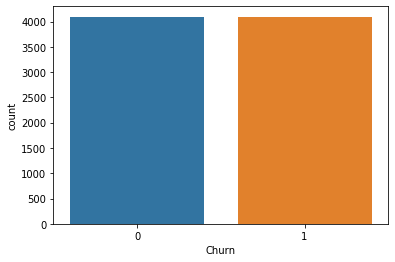

1    4095
0    4095
Name: Churn, dtype: int64
Percentage of people who have chruned out: 50.0 %


In [37]:
sns.countplot(x='Churn',data=os_train_y)
plt.show()

# What are the counts?
print(os_train_y.Churn.value_counts())

# What is the percentage?
count_yes = len(os_train_y[os_train_y.Churn == 1])
count_no = len(os_train_y[os_train_y.Churn != 1])

percent_success = count_yes/(count_yes + count_no)*100

print('Percentage of people who have chruned out:', percent_success, "%")

### Model 1 Logistic regression

In [38]:
clf_logreg = Pipeline(steps=[('classifier', LogisticRegression(random_state=123))])

clf_logreg.fit(os_train_x,os_train_y)

train_pred = clf_logreg.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_logreg.predict(x_test_pp).reshape(1,-1)[0]

train_pred_lr = train_pred
test_pred_lr= test_pred


print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[3196  899]
 [ 909 3186]]
Train Scores
Train Precision:  0.7799265605875153
Train Recall:  0.778021978021978
Train Accuracy:  0.7792429792429793
F1 Score Train:  1.2106363965704627


Test Data:
Confusion matrix Test:
[[1395  378]
 [ 106  329]]
Test Scores
Test Precision:  0.46534653465346537
Test Recall:  0.7563218390804598
Test Accuracy:  0.7807971014492754
F1 Score Test:  1.144045448540098


### Model 2 SVM Model Type 1 

In [39]:
from sklearn.naive_bayes import GaussianNB

clf_svc = Pipeline(steps=[('classifier', SVC())])

clf_svc.set_params(classifier__kernel='linear',classifier__C=1,
                   classifier__random_state=123)

clf_svc.fit(os_train_x,os_train_y)

train_pred = clf_svc.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_svc.predict(x_test_pp).reshape(1,-1)[0]

train_pred_svc = train_pred
test_pred_svc= test_pred


print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[3200  895]
 [ 903 3192]]
Train Scores
Train Precision:  0.7810129679471495
Train Recall:  0.7794871794871795
Train Accuracy:  0.7804639804639805
F1 Score Train:  1.215200525969757


Test Data:
Confusion matrix Test:
[[1384  389]
 [ 104  331]]
Test Scores
Test Precision:  0.4597222222222222
Test Recall:  0.7609195402298851
Test Accuracy:  0.7767210144927537
F1 Score Test:  1.1579970934073194


### Model 3 KNN

In [40]:

clf_knn = Pipeline(steps=[('classifier', KNeighborsClassifier())])

clf_knn.set_params(classifier__n_neighbors=5)


clf_knn.fit(os_train_x,os_train_y)

train_pred = clf_knn.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_knn.predict(x_test_pp).reshape(1,-1)[0]

train_pred_knn = train_pred
test_pred_knn= test_pred

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[3079 1016]
 [  26 4069]]
Train Scores
Train Precision:  0.800196656833825
Train Recall:  0.9936507936507937
Train Accuracy:  0.8727716727716728
F1 Score Train:  1.9746837994457043


Test Data:
Confusion matrix Test:
[[1143  630]
 [ 143  292]]
Test Scores
Test Precision:  0.31670281995661603
Test Recall:  0.671264367816092
Test Accuracy:  0.6499094202898551
F1 Score Test:  0.9011917029990753


### Model 4 Decision Tress Type 1

In [41]:
from sklearn import tree

clf_dt1 = Pipeline(steps=[('classifier', tree.DecisionTreeClassifier())])

clf_dt1.set_params(classifier__random_state=123)

clf_dt1.fit(os_train_x,os_train_y)

train_pred = clf_dt1.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_dt1.predict(x_test_pp).reshape(1,-1)[0]

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[4095    0]
 [   0 4095]]
Train Scores
Train Precision:  1.0
Train Recall:  1.0
Train Accuracy:  1.0
F1 Score Train:  2.0


Test Data:
Confusion matrix Test:
[[1471  302]
 [ 205  230]]
Test Scores
Test Precision:  0.4323308270676692
Test Recall:  0.5287356321839081
Test Accuracy:  0.7703804347826086
F1 Score Test:  0.5591227374818339


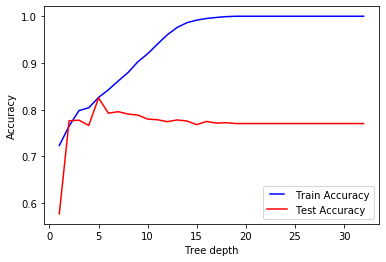

In [42]:
from sklearn import tree

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = Pipeline(steps=[('classifier', tree.DecisionTreeClassifier(max_depth=max_depth))])
    dt.set_params(classifier__random_state=123)
    #dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(os_train_x,os_train_y)
    
    train_pred = dt.predict(os_train_x).reshape(1,-1)[0]
    confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    test_pred = dt.predict(x_test_pp).reshape(1,-1)[0]
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

### Model 5 Decision Tress Type 2

In [43]:
#After plotting the graph deciding the max Depth and building a model in Decision tree

from sklearn import tree

clf_dt2 = Pipeline(steps=[('classifier', tree.DecisionTreeClassifier(random_state=123))])

clf_dt2.set_params(classifier__criterion ='entropy',classifier__max_depth=5,classifier__random_state=123)

clf_dt2.fit(os_train_x,os_train_y)

train_pred = clf_dt2.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_dt2.predict(x_test_pp).reshape(1,-1)[0]

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[3710  385]
 [1049 3046]]
Train Scores
Train Precision:  0.8877878169629846
Train Recall:  0.7438339438339439
Train Accuracy:  0.8249084249084249
F1 Score Train:  1.1065778719991175


Test Data:
Confusion matrix Test:
[[1586  187]
 [ 196  239]]
Test Scores
Test Precision:  0.5610328638497653
Test Recall:  0.5494252873563218
Test Accuracy:  0.8265398550724637
F1 Score Test:  0.6037362927731535


### Model 6 Decision Tree Using Random Search and CV=5

In [44]:
from sklearn import tree

clf_dt3 = Pipeline(steps=[('classifier', tree.DecisionTreeClassifier())])

clf_dt3_param_random = {'classifier__criterion': ['entropy','gini'], 
                'classifier__max_depth':[3,4,5,6,7]}


clf_dt3_random = RandomizedSearchCV(clf_dt3, param_distributions=clf_dt3_param_random,cv=5,random_state=123)


#clf_dt2.set_params(classifier__criterion ='entropy',classifier__max_depth=15,classifier__random_state=123)

clf_dt3_random.fit(os_train_x,os_train_y)

print(clf_dt3_random.best_params_)

train_pred = clf_dt3_random.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_dt3_random.predict(x_test_pp).reshape(1,-1)[0]

train_pred_dt = train_pred
test_pred_dt= test_pred

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

{'classifier__max_depth': 7, 'classifier__criterion': 'entropy'}
Train Data:
Confusion matrix Train:
[[3548  547]
 [ 627 3468]]
Train Scores
Train Precision:  0.863760896637609
Train Recall:  0.8468864468864469
Train Accuracy:  0.8566544566544566
F1 Score Train:  1.4344333078399012


Test Data:
Confusion matrix Test:
[[1491  282]
 [ 153  282]]
Test Scores
Test Precision:  0.5
Test Recall:  0.6482758620689655
Test Accuracy:  0.8029891304347826
F1 Score Test:  0.8405231866825207


### Model 7 Random Forest

In [45]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


clf_rf1 = Pipeline(steps=[('classifier',RandomForestClassifier())])
clf_rf1.set_params(classifier__random_state=123)


clf_rf1.fit(os_train_x,os_train_y)

train_pred = clf_rf1.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_rf1.predict(x_test_pp).reshape(1,-1)[0]

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[4095    0]
 [   0 4095]]
Train Scores
Train Precision:  1.0
Train Recall:  1.0
Train Accuracy:  1.0
F1 Score Train:  2.0


Test Data:
Confusion matrix Test:
[[1660  113]
 [ 220  215]]
Test Scores
Test Precision:  0.6554878048780488
Test Recall:  0.4942528735632184
Test Accuracy:  0.8491847826086957
F1 Score Test:  0.48857180605099754


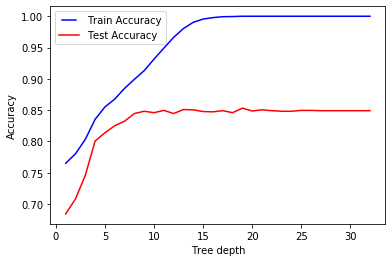

In [46]:
from sklearn import tree

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf = Pipeline(steps=[('classifier', RandomForestClassifier(max_depth=max_depth))])
    rf.set_params(classifier__random_state=123)
    #dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    rf.fit(os_train_x,os_train_y)
    
    train_pred = rf.predict(os_train_x).reshape(1,-1)[0]
    confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    test_pred = rf.predict(x_test_pp).reshape(1,-1)[0]
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

### Model 8 Random Forest type 2

In [47]:
#After plotting the graph deciding the max Depth and building a model in Random forest


from sklearn import tree

clf_rf2 = Pipeline(steps=[('classifier', RandomForestClassifier())])

clf_rf2_param_random = {'classifier__criterion': ['entropy','gini'], 
                'classifier__max_depth':[15,16,17,18]}


clf_rf2_random = RandomizedSearchCV(clf_rf2, param_distributions=clf_rf2_param_random,cv=10,random_state=123)


#clf_dt2.set_params(classifier__criterion ='entropy',classifier__max_depth=15,classifier__random_state=123)

clf_rf2_random.fit(os_train_x,os_train_y)

print(clf_rf2_random.best_params_)

train_pred = clf_rf2_random.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_rf2_random.predict(x_test_pp).reshape(1,-1)[0]

train_pred_rf = train_pred
test_pred_rf= test_pred

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

{'classifier__max_depth': 18, 'classifier__criterion': 'gini'}
Train Data:
Confusion matrix Train:
[[4094    1]
 [   0 4095]]
Train Scores
Train Precision:  0.999755859375
Train Recall:  1.0
Train Accuracy:  0.9998778998778999
F1 Score Train:  2.0


Test Data:
Confusion matrix Test:
[[1663  110]
 [ 217  218]]
Test Scores
Test Precision:  0.6646341463414634
Test Recall:  0.5011494252873563
Test Accuracy:  0.8519021739130435
F1 Score Test:  0.502301492931695


### Test dataset Try 1 with Model 8 Random Forest

In [48]:
testdata = pd.read_csv("test_data-1578037501169.csv", sep=',', header=0,
                        na_values='unknown')
print(testdata.shape)
print((testdata.dtypes))
testdata.drop("CustomerID", axis = 1, inplace= True)
testdata.drop("CustomerName", axis = 1, inplace= True)
testdata['NumberOfProducts'] = testdata['NumberOfProducts'].astype('category')
testdata['IsCreditCardCustomer'] = testdata['IsCreditCardCustomer'].astype('category')
testdata['ActiveMember'] = testdata['ActiveMember'].astype('category')
cat_attr1 = list(testdata.select_dtypes("object").columns)
cat_attr1

for col in cat_attr1:
    testdata[col] = testdata[col].astype('category')
    
print((testdata.dtypes))

cat_attr = list(testdata.select_dtypes("category").columns)
num_attr = list(testdata.columns.difference(cat_attr))


(1840, 20)
CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
dtype: object
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occup

In [49]:
clf2 = Pipeline(steps=[('preprocessor', preprocessor)])

In [50]:
x_test_unseen = pd.DataFrame(clf2.transform(testdata))  #Test data after Preprocessed

In [51]:
test_pred_unseen = clf_rf2_random.predict(x_test_unseen).reshape(1,-1)[0]  # Predict on whichever model u want

In [52]:
test_pred_unseen2 = pd.DataFrame(test_pred_unseen)

In [53]:
test_pred_unseen2.to_csv("Testingset1.csv")

### Model 9 Ada Boosting (Boosting Model 5 Decision Tree)

In [54]:
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_ada = Pipeline(steps=[('classifier', AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')))])

clf_ada.set_params(classifier__n_estimators=600,classifier__learning_rate=1,classifier__random_state=123)


#clf_dt2.set_params(classifier__criterion ='entropy',classifier__max_depth=15,classifier__random_state=123)

clf_ada.fit(os_train_x,os_train_y)


train_pred = clf_ada.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_ada.predict(x_test_pp).reshape(1,-1)[0]

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[4095    0]
 [   0 4095]]
Train Scores
Train Precision:  1.0
Train Recall:  1.0
Train Accuracy:  1.0
F1 Score Train:  2.0


Test Data:
Confusion matrix Test:
[[1688   85]
 [ 263  172]]
Test Scores
Test Precision:  0.669260700389105
Test Recall:  0.3954022988505747
Test Accuracy:  0.842391304347826
F1 Score Test:  0.31268595587263837


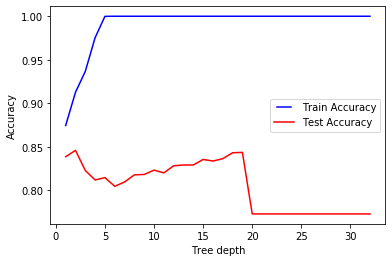

In [55]:
from sklearn import tree

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    ada = Pipeline(steps=[('classifier', AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=max_depth)))])
    ada.set_params(classifier__random_state=123)
    #dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    ada.fit(os_train_x,os_train_y)
    
    train_pred = ada.predict(os_train_x).reshape(1,-1)[0]
    confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    test_pred = ada.predict(x_test_pp).reshape(1,-1)[0]
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

### Model 10 Ada Boosting Type 2 (Boosting Model 5 Decision Tree)

In [56]:
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_ada1 = Pipeline(steps=[('classifier', AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')))])

clf_ada1.set_params(classifier__n_estimators=600,classifier__learning_rate=1,classifier__random_state=123)


#clf_dt2.set_params(classifier__criterion ='entropy',classifier__max_depth=15,classifier__random_state=123)

clf_ada1.fit(os_train_x,os_train_y)


train_pred = clf_ada1.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_ada1.predict(x_test_pp).reshape(1,-1)[0]

train_pred_ada = train_pred
test_pred_ada= test_pred

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[4091    4]
 [  27 4068]]
Train Scores
Train Precision:  0.9990176817288802
Train Recall:  0.9934065934065934
Train Accuracy:  0.9962148962148962
F1 Score Train:  1.9737133196473855


Test Data:
Confusion matrix Test:
[[1598  175]
 [ 251  184]]
Test Scores
Test Precision:  0.5125348189415042
Test Recall:  0.42298850574712643
Test Accuracy:  0.8070652173913043
F1 Score Test:  0.3578385519883736


### Model 11 Stacking (Logistic, SVM(linear), KNN, DT, Random forest, ADA)

In [57]:
stack_train = pd.DataFrame([train_pred_lr,train_pred_svc,train_pred_knn,train_pred_dt,train_pred_rf,train_pred_ada])
stack_test = pd.DataFrame([test_pred_lr,test_pred_svc,test_pred_knn,test_pred_dt,test_pred_rf,test_pred_ada])

In [58]:
stack_train = stack_train.T
stack_test = stack_test.T

In [60]:
stack_train.columns = ['train_pred_lr','train_pred_svc','train_pred_knn','train_pred_dt','train_pred_rf','train_pred_ada']

stack_test.columns = ['test_pred_lr','test_pred_svc','test_pred_knn','test_pred_dt','test_pred_rf','test_pred_ada']

In [61]:
print(stack_train.shape)
print(stack_test.shape)

(8190, 6)
(2208, 6)


In [64]:
stack = LogisticRegression()

stack.fit(stack_train,os_train_y)

stacked_pred_train = stack.predict(stack_train)
stacked_pred_test = stack.predict(stack_test)

In [65]:
print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,stacked_pred_train)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,stacked_pred_test)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[4094    1]
 [   0 4095]]
Train Scores
Train Precision:  0.999755859375
Train Recall:  1.0
Train Accuracy:  0.9998778998778999
F1 Score Train:  2.0


Test Data:
Confusion matrix Test:
[[1663  110]
 [ 217  218]]
Test Scores
Test Precision:  0.6646341463414634
Test Recall:  0.5011494252873563
Test Accuracy:  0.8519021739130435
F1 Score Test:  0.502301492931695


### Model 12 SVM Type 2

In [68]:
from sklearn.naive_bayes import GaussianNB

clf_svc2 = Pipeline(steps=[('classifier', SVC())])

clf_svc2.set_params(classifier__kernel='rbf',classifier__C=1,classifier__gamma=0.001,classifier__random_state=123)

clf_svc2.fit(os_train_x,os_train_y)

train_pred = clf_svc2.predict(os_train_x).reshape(1,-1)[0]
test_pred = clf_svc2.predict(x_test_pp).reshape(1,-1)[0]

#train_pred_svc2 = train_pred
#test_pred_svc2= test_pred


print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[3010 1085]
 [ 844 3251]]
Train Scores
Train Precision:  0.7497693726937269
Train Recall:  0.7938949938949939
Train Accuracy:  0.7644688644688644
F1 Score Train:  1.2605385226630648


Test Data:
Confusion matrix Test:
[[1305  468]
 [  93  342]]
Test Scores
Test Precision:  0.4222222222222222
Test Recall:  0.7862068965517242
Test Accuracy:  0.7459239130434783
F1 Score Test:  1.236242568370987


### Model 13 SVM Type 3 With Random Search and CV = 5

In [74]:
clf_svc3 = Pipeline(steps=[('classifier', SVC())])


svc3_param_random = {'classifier__C': [0.01, 0.1, 1], 
                  'classifier__gamma':[0, 0.0001, 0.001, 0.01], 
                 "classifier__kernel":['rbf']}


svc3_random = RandomizedSearchCV(clf_svc3, param_distributions=svc3_param_random, cv=5,random_state=123)


#clf_svc2.set_params(classifier__kernel='rbf',classifier__C=1,classifier__gamma=0.001,classifier__random_state=123)

svc3_random.fit(os_train_x,os_train_y)

train_pred = svc3_random.predict(os_train_x).reshape(1,-1)[0]
test_pred = svc3_random.predict(x_test_pp).reshape(1,-1)[0]

train_pred_svc3 = train_pred
test_pred_svc3= test_pred

print(svc3_random.best_params_)
print("\n")
print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

{'classifier__kernel': 'rbf', 'classifier__gamma': 0.01, 'classifier__C': 0.1}


Train Data:
Confusion matrix Train:
[[3045 1050]
 [ 804 3291]]
Train Scores
Train Precision:  0.7581202487906012
Train Recall:  0.8036630036630037
Train Accuracy:  0.7736263736263737
F1 Score Train:  1.291748446913282


Test Data:
Confusion matrix Test:
[[1313  460]
 [ 102  333]]
Test Scores
Test Precision:  0.41992433795712486
Test Recall:  0.7655172413793103
Test Accuracy:  0.7454710144927537
F1 Score Test:  1.1720332936979785


### Model 14 Stacking (Logistic, SVM(linear), KNN, DT, Random forest, ADA, svm 2, svm3)

In [84]:
stack_train = pd.DataFrame([train_pred_lr,train_pred_svc,train_pred_knn,train_pred_dt,train_pred_rf,train_pred_ada,
                           train_pred_svc2,train_pred_svc3])
stack_test = pd.DataFrame([test_pred_lr,test_pred_svc,test_pred_knn,test_pred_dt,test_pred_rf,test_pred_ada,
                          test_pred_svc2,test_pred_svc3])


stack_train = stack_train.T
stack_test = stack_test.T

In [85]:
stack_train.columns = ['train_pred_lr','train_pred_svc','train_pred_knn','train_pred_dt','train_pred_rf','train_pred_ada',
                      'train_pred_svc2','train_pred_svc3']

stack_test.columns = ['test_pred_lr','test_pred_svc','test_pred_knn','test_pred_dt','test_pred_rf','test_pred_ada',
                     'test_pred_svc2','test_pred_svc3']

In [86]:
print(stack_train.shape)
print(stack_test.shape)

(8190, 8)
(2208, 8)


In [92]:
stack = LogisticRegression()

#stack_param_random = {'n_neighbors': [6,7,8]}


#stack_random = RandomizedSearchCV(stack, param_distributions=stack_param_random, cv=5,random_state=123)

stack.fit(stack_train,os_train_y)

stacked_pred_train = stack.predict(stack_train)
stacked_pred_test = stack.predict(stack_test)

#print(stack_random.best_params_)
#print("\n")

print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,stacked_pred_train)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,stacked_pred_test)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

Train Data:
Confusion matrix Train:
[[4094    1]
 [   0 4095]]
Train Scores
Train Precision:  0.999755859375
Train Recall:  1.0
Train Accuracy:  0.9998778998778999
F1 Score Train:  2.0


Test Data:
Confusion matrix Test:
[[1663  110]
 [ 217  218]]
Test Scores
Test Precision:  0.6646341463414634
Test Recall:  0.5011494252873563
Test Accuracy:  0.8519021739130435
F1 Score Test:  0.502301492931695


### Test dataset Try2 with Model 9 SVM type 3

In [90]:
testdata = pd.read_csv("test_data-1578037501169.csv", sep=',', header=0,
                        na_values='unknown')
print(testdata.shape)
print((testdata.dtypes))
testdata.drop("CustomerID", axis = 1, inplace= True)
testdata.drop("CustomerName", axis = 1, inplace= True)
testdata['NumberOfProducts'] = testdata['NumberOfProducts'].astype('category')
testdata['IsCreditCardCustomer'] = testdata['IsCreditCardCustomer'].astype('category')
testdata['ActiveMember'] = testdata['ActiveMember'].astype('category')
cat_attr1 = list(testdata.select_dtypes("object").columns)
cat_attr1

for col in cat_attr1:
    testdata[col] = testdata[col].astype('category')
    
print((testdata.dtypes))

cat_attr = list(testdata.select_dtypes("category").columns)
num_attr = list(testdata.columns.difference(cat_attr))


(1840, 20)
CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
dtype: object
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occup

In [91]:
clf2 = Pipeline(steps=[('preprocessor', preprocessor)])

x_test_unseen = pd.DataFrame(clf2.transform(testdata))  #Test data after Preprocessed

test_pred_unseen = svc3_random.predict(x_test_unseen).reshape(1,-1)[0]  # Predict on whichever model u want

test_pred_unseen2 = pd.DataFrame(test_pred_unseen)

test_pred_unseen2.to_csv("Testingset2.csv")

### Model 15 SVC Type 4 (Grid Search and CV = 10)

In [96]:
clf_svc4 = Pipeline(steps=[('classifier', SVC())])


svc4_param_grid = {'classifier__C': [0.01, 0.1, 1], 
                  'classifier__gamma':[0, 0.0001, 0.001, 0.01], 
                 "classifier__kernel":['rbf']}


svc4_random = GridSearchCV(clf_svc4, param_grid=svc4_param_grid, cv=10)


#clf_svc2.set_params(classifier__kernel='rbf',classifier__C=1,classifier__gamma=0.001,classifier__random_state=123)

svc4_random.fit(os_train_x,os_train_y)

train_pred = svc4_random.predict(os_train_x).reshape(1,-1)[0]
test_pred = svc4_random.predict(x_test_pp).reshape(1,-1)[0]

train_pred_svc4 = train_pred
test_pred_svc4= test_pred

print(svc3_random.best_params_)
print("\n")
print("Train Data:")
print("Confusion matrix Train:")
confusion_matrix_train = confusion_matrix(os_train_y,train_pred)
print(confusion_matrix_train)
Train_Scores(confusion_matrix_train)
print("\n")

print("Test Data:")
print("Confusion matrix Test:")
confusion_matrix_test = confusion_matrix(y_test,test_pred)
print(confusion_matrix_test)
Test_Scores(confusion_matrix_test)

{'classifier__kernel': 'rbf', 'classifier__gamma': 0.01, 'classifier__C': 0.1}


Train Data:
Confusion matrix Train:
[[3225  870]
 [ 720 3375]]
Train Scores
Train Precision:  0.7950530035335689
Train Recall:  0.8241758241758241
Train Accuracy:  0.8058608058608059
F1 Score Train:  1.358531578311798


Test Data:
Confusion matrix Test:
[[1377  396]
 [ 107  328]]
Test Scores
Test Precision:  0.4530386740331492
Test Recall:  0.7540229885057471
Test Accuracy:  0.7721920289855072
F1 Score Test:  1.137101334390276


### Test dataset Try3 with Model 9 SVM type 4

In [97]:
testdata = pd.read_csv("test_data-1578037501169.csv", sep=',', header=0,
                        na_values='unknown')
print(testdata.shape)
print((testdata.dtypes))
testdata.drop("CustomerID", axis = 1, inplace= True)
testdata.drop("CustomerName", axis = 1, inplace= True)
testdata['NumberOfProducts'] = testdata['NumberOfProducts'].astype('category')
testdata['IsCreditCardCustomer'] = testdata['IsCreditCardCustomer'].astype('category')
testdata['ActiveMember'] = testdata['ActiveMember'].astype('category')
cat_attr1 = list(testdata.select_dtypes("object").columns)
cat_attr1

for col in cat_attr1:
    testdata[col] = testdata[col].astype('category')
    
print((testdata.dtypes))

cat_attr = list(testdata.select_dtypes("category").columns)
num_attr = list(testdata.columns.difference(cat_attr))


(1840, 20)
CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
dtype: object
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occup

In [98]:
clf3 = Pipeline(steps=[('preprocessor', preprocessor)])

x_test_unseen = pd.DataFrame(clf3.transform(testdata))  #Test data after Preprocessed

test_pred_unseen = svc4_random.predict(x_test_unseen).reshape(1,-1)[0]  # Predict on whichever model u want

test_pred_unseen2 = pd.DataFrame(test_pred_unseen)

test_pred_unseen2.to_csv("Testingset3.csv")